# This notebok is a part of Section 3.3 

## Import all libraries that we will need

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sqlalchemy import create_engine

## Fixing path

In [4]:
os.chdir('D:')
os.getcwd()

'D:\\'

## Working with SQL databases

SQL (pronounced "ess-que-el") stands for Structured Query Language. SQL is used to communicate with a database. According to ANSI (American National Standards Institute), it is the standard language for relational database management systems.

### There are many implementations of SQL language but here we will use built in sqllite using sqlalchemy library

In [6]:
engine = create_engine('sqlite:///Chinook.sqlite')
table_names = engine.table_names()
print(table_names)

['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


In [8]:
con = engine.connect()
rs = con.execute("SELECT * FROM Customer")
df = pd.DataFrame(rs.fetchall())
df.columns = rs.keys()
con.close()
print(df)

    CustomerId  FirstName      LastName  \
0            1       Luís     Gonçalves   
1            2     Leonie        Köhler   
2            3   François      Tremblay   
3            4      Bjørn        Hansen   
4            5  František   Wichterlová   
5            6     Helena          Holý   
6            7     Astrid        Gruber   
7            8       Daan       Peeters   
8            9       Kara       Nielsen   
9           10    Eduardo       Martins   
10          11  Alexandre         Rocha   
11          12    Roberto       Almeida   
12          13   Fernanda         Ramos   
13          14       Mark       Philips   
14          15   Jennifer      Peterson   
15          16      Frank        Harris   
16          17       Jack         Smith   
17          18   Michelle        Brooks   
18          19        Tim         Goyer   
19          20        Dan        Miller   
20          21      Kathy         Chase   
21          22    Heather       Leacock   
22         

## API

We won't explain in details how to work with APIs as this is not the main focus

However, you need to know that companies and websites provide APIs on free and paid basis. Each of them has specific way to access their data. 

Sometimes there are already Python libraries , so called 'wrappers',created to handle this data fetching using some functions.

## Detecting Outliers

### Import the Dataset

In [44]:
fords=pd.read_csv('fords.csv')

### Look at the structure of the data

In [45]:
fords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 7 columns):
Year        635 non-null int64
Mileage     616 non-null float64
Price       629 non-null float64
Color       625 non-null object
Location    635 non-null object
Model       627 non-null object
Age         635 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 34.8+ KB


As we can see, the data has 635 examples with 7 features. 
We can see also that there are missing data in some features such as Mileage and Price

## Let's visualize the data to see if there are any outliers

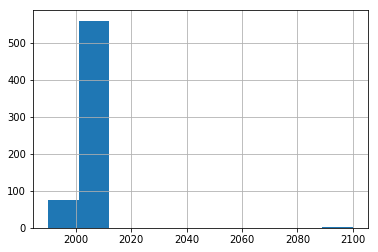

In [46]:
fords.Year.hist()
plt.show()

The outliers are clear !
They exist at nearly 2090
So, let's filter them out

In [47]:
fords = fords[fords.Year<2090]

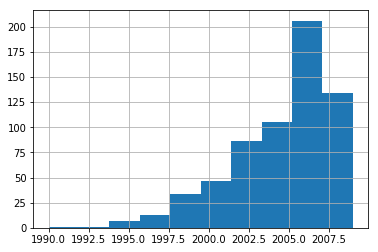

In [48]:
fords.Year.hist()
plt.show()

Let us take a look at another feature distribution

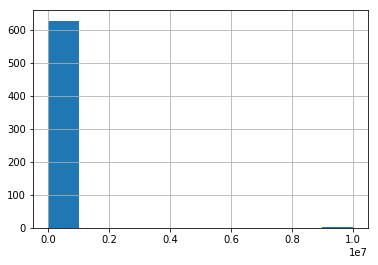

In [49]:
fords.Price.hist()
plt.show()

Let us do the same

In [61]:
fords = fords[fords.Price>8000000]

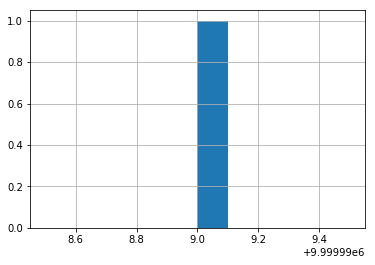

In [62]:
fords.Price.hist()
plt.show()

### We can delete them using a smarter way

In [64]:
fords=pd.read_csv('fords.csv')
fords=fords.loc[~((fords.Price>8000000)|(fords.Year>2080)),]
fords

,Year,Mileage,Price,Color,Location,Model,Age
0,1990,NaN,1600.0,NaN,Phoenix,NaN,19
1,1994,94000.0,1988.0,white,Phoenix,GL,15
2,1995,NaN,2288.0,white,Phoenix,NaN,14
3,1995,68000.0,2495.0,NaN,Phoenix,NaN,14
4,1995,NaN,1995.0,NaN,Phoenix,GL,14
5,1996,115730.0,2199.0,beige,Phoenix,GL,13
6,1997,74564.0,2995.0,green,Phoenix,GL,12
7,1998,143000.0,1200.0,blue,Fresno,SE,11
8,1998,91000.0,2488.0,red,Phoenix,NaN,11
10,1999,85000.0,2488.0,white,Phoenix,SE,10


In [65]:
fords[fords.Price>8000000]


,Year,Mileage,Price,Color,Location,Model,Age


In [66]:
fords[fords.Year>2080]

,Year,Mileage,Price,Color,Location,Model,Age


## Missing Data

In [68]:
fords.isna() ## We call this function to detect the missing data

,Year,Mileage,Price,Color,Location,Model,Age
0,False,True,False,True,False,True,False
1,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False
3,False,False,False,True,False,True,False
4,False,True,False,True,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False
10,False,False,False,False,False,False,False


In [69]:
fords.dropna(inplace=True) ## Drop the missing data

Let's check our dataset now

In [70]:
fords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 634
Data columns (total 7 columns):
Year        598 non-null int64
Mileage     598 non-null float64
Price       598 non-null float64
Color       598 non-null object
Location    598 non-null object
Model       598 non-null object
Age         598 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 37.4+ KB


# The dataset is ready to be used !